In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('amzn.csv')

df=df.set_index(pd.DatetimeIndex(df['Date'].values))

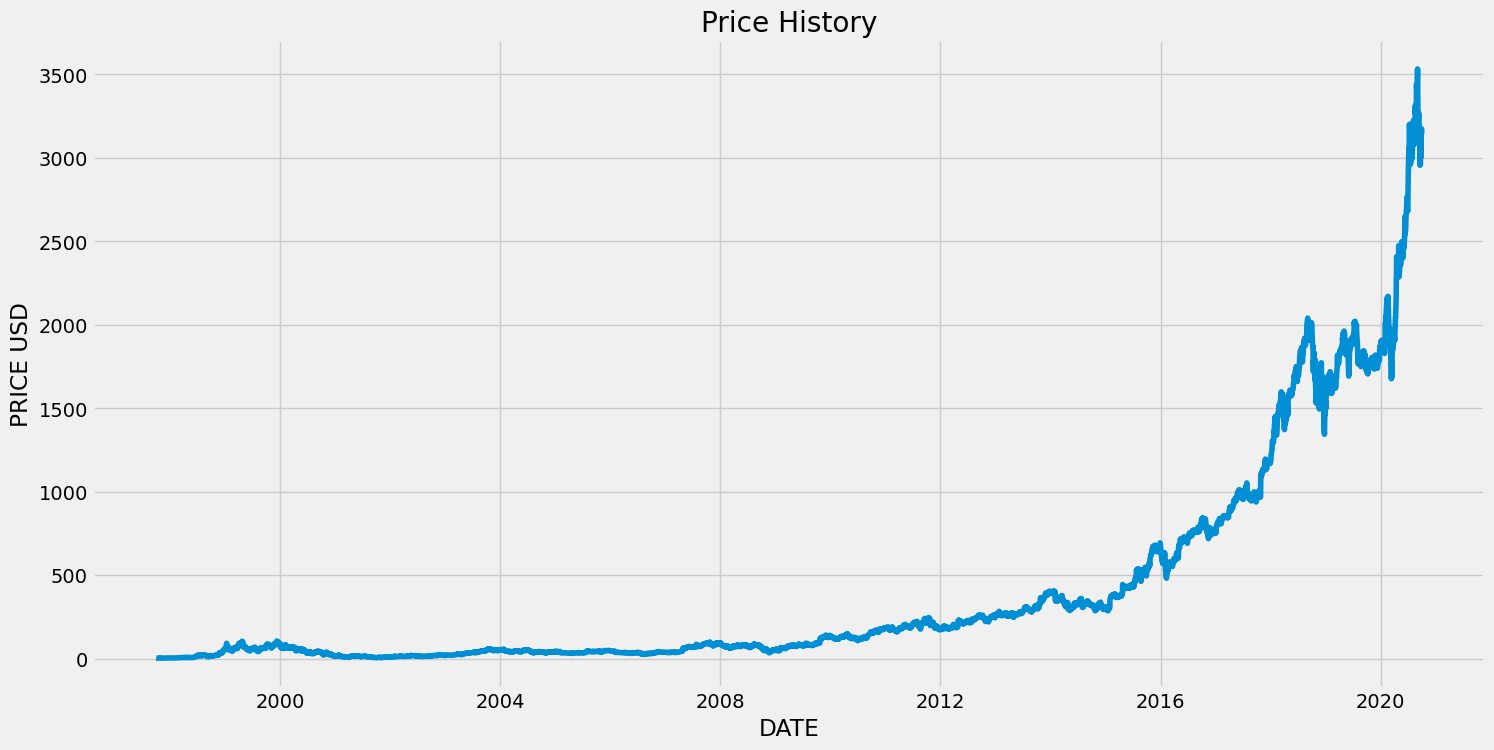

In [3]:
plt.figure(figsize=(16,8))
plt.title('Price History')
plt.plot(df['Close'])
plt.xlabel('DATE')
plt.ylabel('PRICE USD')
plt.show()


In [4]:
data=df.filter(['Close' , 'Volume'])
dataset=data.values
dataset

array([[4.33854200e+00, 5.25480000e+06],
       [4.02083300e+00, 4.99920000e+06],
       [4.01041700e+00, 1.87680000e+06],
       ...,
       [3.09512988e+03, 4.61520000e+06],
       [3.17405005e+03, 4.22420000e+06],
       [3.14487988e+03, 3.49580000e+06]])

In [5]:
training_data_len=math.ceil(len(dataset)*0.8)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[2.02261169e-04, 4.59120587e-02],
       [1.12203130e-04, 4.34506269e-02],
       [1.09250602e-04, 1.33818686e-02],
       ...,
       [8.76320375e-01, 3.97527012e-02],
       [8.98691146e-01, 3.59873654e-02],
       [8.90422548e-01, 2.89728626e-02]])

In [6]:
scaled_data.shape


(5788, 2)

In [7]:
training_data_len

4631

In [8]:
training_data=scaled_data[0:training_data_len , :]


In [9]:
training_data

array([[2.02261169e-04, 4.59120587e-02],
       [1.12203130e-04, 4.34506269e-02],
       [1.09250602e-04, 1.33818686e-02],
       ...,
       [1.55709257e-01, 3.43175208e-02],
       [1.56021057e-01, 5.53196202e-02],
       [1.56335712e-01, 3.88888889e-02]])

In [10]:
xtrain=[]
ytrain=[]
n=60

In [11]:
for i in range(n,len(training_data)):
    xtrain.append(training_data[i-n:i , :])
    ytrain.append(training_data[i,0])


In [12]:
xtrain , ytrain = np.array(xtrain),np.array(ytrain)


In [13]:
xtrain.shape


(4571, 60, 2)

In [14]:
ytrain.shape


(4571,)

In [15]:
ytrain=np.reshape(ytrain , (ytrain.shape[0],1,1))
ytrain.shape

(4571, 1, 1)

In [16]:
model=Sequential()
# input_shape = (time steps , features )
model.add(LSTM(50,return_sequences=True,input_shape=(xtrain.shape[1],2)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [17]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(xtrain,ytrain,batch_size=1,epochs=1)




4571/4571 [==============================] - 173s 36ms/step - loss: 4.6866e-05


In [18]:
test_data=scaled_data[training_data_len - n : , :]
xtest=[]
ytest=dataset[training_data_len : , 0]
for i in range(n , len(test_data)):
    xtest.append(test_data[i-n : i , :])

In [19]:
test_data

array([[0.18741718, 0.05013386],
       [0.19145933, 0.04106238],
       [0.19059478, 0.03646213],
       ...,
       [0.87632037, 0.0397527 ],
       [0.89869115, 0.03598737],
       [0.89042255, 0.02897286]])

In [20]:
test_data.shape


(1217, 2)

In [21]:
ytest=np.array(ytest)
ytest.shape

(1157,)

In [22]:
xtest=np.array(xtest)
xtest.shape

(1157, 60, 2)

In [23]:
prediction=model.predict(xtest)


37/37 [==============================] - 1s 9ms/step


In [24]:
Predict_dataset_like = np.zeros(shape=(len(prediction), 2) )

Predict_dataset_like[:,0] = prediction[:,0]

prediction = scaler.inverse_transform(Predict_dataset_like)[:,0]

In [25]:
prediction 


array([ 576.43524327,  579.98079102,  582.26921116, ..., 2860.74498224,
       2868.7183906 , 2890.23370333])

In [26]:
rmse =np.sqrt(np.mean(((prediction- ytest)**2)))
print(rmse)


77.70452748064993


In [27]:
prediction

array([ 576.43524327,  579.98079102,  582.26921116, ..., 2860.74498224,
       2868.7183906 , 2890.23370333])

In [28]:
prediction.shape

(1157,)

In [29]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['prediction']=prediction

C:\Users\moham\AppData\Local\Temp\ipykernel_1252\3517524298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction']=prediction


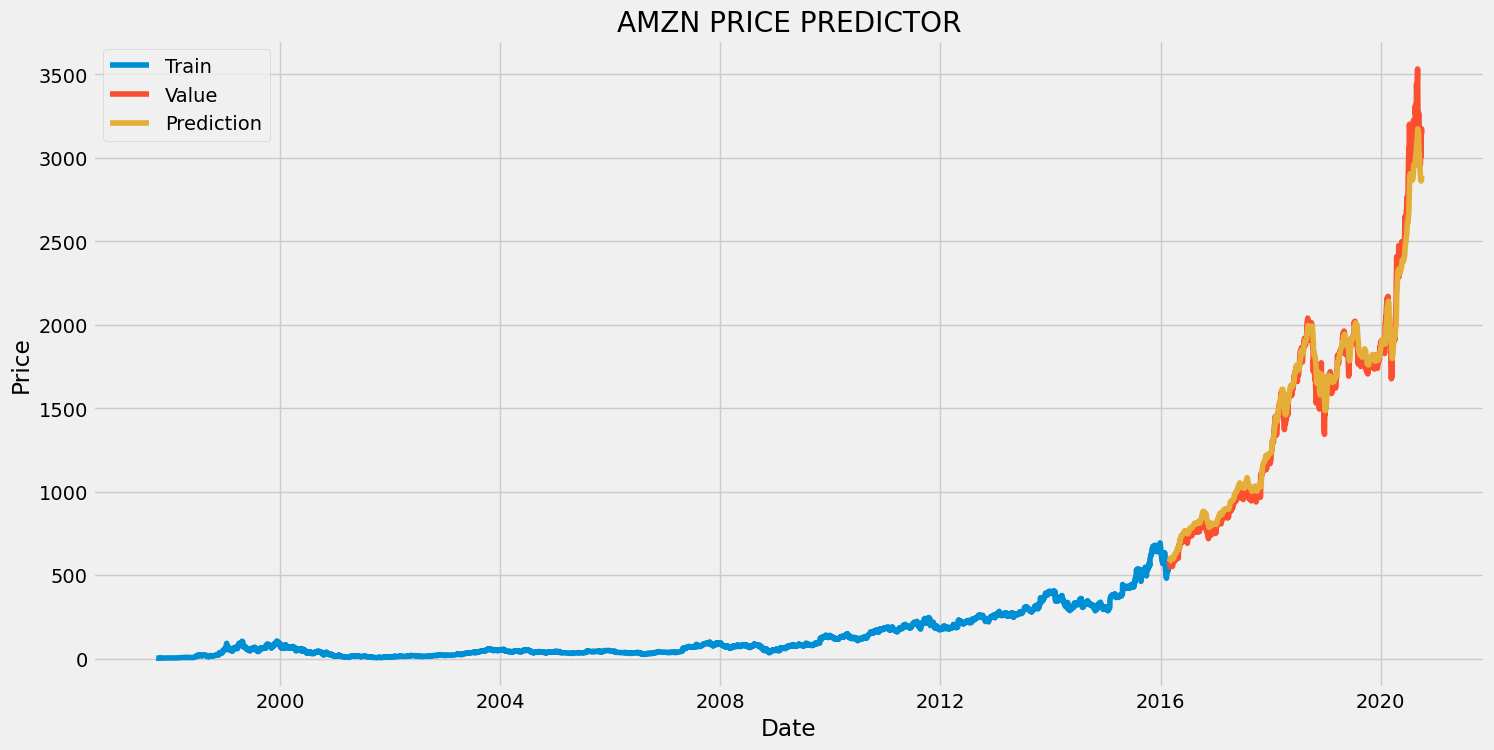

In [30]:
plt.figure(figsize=(16,8))
plt.title('AMZN PRICE PREDICTOR')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Train','Value','Prediction'])
plt.show()

In [31]:
newdf=data[-60:].values
snewdf=scaler.transform(newdf)

In [32]:
xtest=[]
xtest.append(snewdf)
xtest=np.array(xtest)
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],2))

In [33]:
prediction=model.predict(xtest)

Predict_dataset_like = np.zeros(shape=(len(prediction), 2) )

Predict_dataset_like[:,0] = prediction[:,0]

prediction = scaler.inverse_transform(Predict_dataset_like)[:,0]

prediction

1/1 [==============================] - 0s 27ms/step


array([2908.30850055])

In [36]:
pred_df = pd.DataFrame()
pred_df['Date'] = pd.date_range(start = df.Date.iloc[-1] , periods = 2 , closed = 'right')

pred_df['Close'] = prediction
pred_df =pred_df.set_index(pd.DatetimeIndex(pred_df['Date'].values))


TypeError: DatetimeArray._generate_range() got an unexpected keyword argument 'closed'

In [37]:
mypred = pd.concat([data, pred_df])

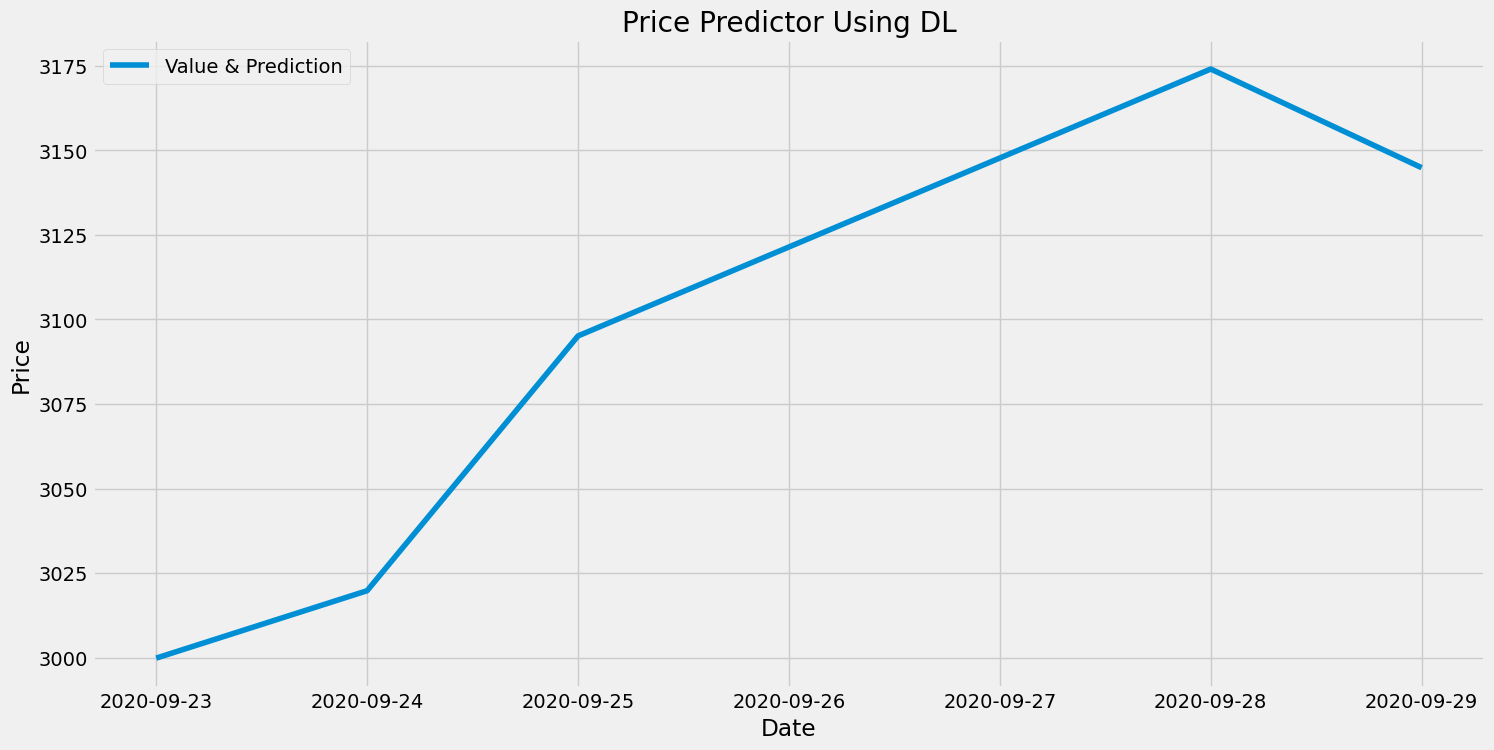

In [38]:
plt.figure(figsize=(16,8))
plt.title('Price Predictor Using DL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(mypred['Close'].tail())
plt.legend(['Value & Prediction'])
plt.show()
